# AEC Compliance Agent - Tutorial 1: Data Extraction

## Welcome to Building Data Analysis!

This notebook demonstrates how to load and visualize building data extracted from CAD drawings (DWG/DXF files). We'll explore fire safety equipment, building sectors, and floor plan visualization.

### What are DWG/DXF Files?

- **DWG**: AutoCAD's proprietary format for 2D and 3D design data
- **DXF**: Drawing Exchange Format, an open standard for CAD data exchange
- Both contain geometric information about building elements like walls, doors, equipment, and annotations
- In fire safety analysis, these files contain crucial information about:
  - Fire equipment locations (extinguishers, hydrants, alarms)
  - Building compartmentalization (fire sectors)
  - Evacuation routes and exit locations

Let's start by loading the necessary libraries and data!

In [9]:
# Import necessary libraries
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from pathlib import Path
import sys

# Add src to path for imports
sys.path.insert(0, str(Path().absolute().parent / 'src'))

# Set up matplotlib for better-looking plots
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

print("✅ Libraries imported successfully!")
print("📁 Working directory:", Path().absolute())

✅ Libraries imported successfully!
📁 Working directory: /Users/rauladell/Work/Servitec/aec-compliance-agent/notebooks


## Loading CAD-Extracted Data Only

This tutorial exclusively loads the JSON files that were extracted from real DWG/DXF drawings. No synthetic/example data is generated here. Proceed to load the CAD-extracted mock JSONs below.

In [10]:
# Load fire equipment data (extracted from I01.4 PCI - EXTINCIÓN AUTOMÁTICA.dwg)
with open('../data/blueprints/cad/I01.4_mock_data.json', 'r', encoding='utf-8') as f:
    fire_equipment_data = json.load(f)

# Load sectorization data (extracted from I01.6 PCI - SECTORIZACIÓN.dwg)
with open('../data/blueprints/cad/I01.6_mock_data.json', 'r', encoding='utf-8') as f:
    sectorization_data = json.load(f)

print("🔥 Fire Equipment Data Loaded:")
print(f"   - File: {fire_equipment_data['file']}")
print(f"   - Type: {fire_equipment_data['type']}")
print(f"   - Equipment count: {len(fire_equipment_data['equipment'])}")

print("\n🏢 Sectorization Data Loaded:")
print(f"   - File: {sectorization_data['file']}")
print(f"   - Type: {sectorization_data['type']}")
print(f"   - Sectors count: {len(sectorization_data['sectors'])}")
print(f"   - Fire doors: {len(sectorization_data['fire_doors'])}")

🔥 Fire Equipment Data Loaded:
   - File: I01.4 PCI - EXTINCIÓN AUTOMÁTICA
   - Type: fire_extinguishing
   - Equipment count: 10

🏢 Sectorization Data Loaded:
   - File: I01.6 PCI - SECTORIZACIÓN
   - Type: sectorization
   - Sectors count: 3
   - Fire doors: 2


## Fire Safety Equipment Analysis

Let's examine the fire safety equipment detected in the building. This includes extinguishers, hydrants, sprinklers, alarms, and emergency lighting.

In [11]:
# Analyze fire equipment by type
equipment_types = {}
for equipment in fire_equipment_data['equipment']:
    eq_type = equipment['type']
    if eq_type not in equipment_types:
        equipment_types[eq_type] = 0
    equipment_types[eq_type] += 1

print("🔥 Fire Equipment Inventory:")
print("=" * 40)
for eq_type, count in equipment_types.items():
    print(f"   {eq_type.replace('_', ' ').title()}: {count} units")

# Show detailed equipment information
print("\n📋 Detailed Equipment List:")
print("=" * 50)
for equipment in fire_equipment_data['equipment']:
    x, y = equipment['position']
    print(f"   {equipment['id']}: {equipment['type'].replace('_', ' ').title()} at ({x}, {y})")

🔥 Fire Equipment Inventory:
   Extinguisher: 3 units
   Hydrant: 2 units
   Sprinkler: 2 units
   Alarm: 1 units
   Emergency Light: 2 units

📋 Detailed Equipment List:
   EXT01: Extinguisher at (10, 5)
   EXT02: Extinguisher at (20, 5)
   EXT03: Extinguisher at (30, 5)
   BIE01: Hydrant at (15, 10)
   BIE02: Hydrant at (35, 10)
   SPR01: Sprinkler at (10, 15)
   SPR02: Sprinkler at (20, 15)
   ALM01: Alarm at (25, 20)
   EMG01: Emergency Light at (5, 5)
   EMG02: Emergency Light at (40, 5)


## Building Sectorization Analysis

Fire sectorization is crucial for containing fires and ensuring safe evacuation. Let's examine the building's fire compartments.

In [12]:
# Analyze building sectors
total_area = 0
print("🏢 Building Fire Sectors:")
print("=" * 60)

for sector in sectorization_data['sectors']:
    total_area += sector['area']
    print(f"   {sector['id']}: {sector['name']}")
    print(f"      Fire Rating: {sector['fire_rating']}")
    print(f"      Area: {sector['area']} m²")
    print(f"      Boundary points: {len(sector['boundary'])}")
    print()

print(f"📊 Total building area: {total_area} m²")

# Analyze fire doors
print("\n🚪 Fire Doors:")
print("=" * 30)
for door in sectorization_data['fire_doors']:
    x, y = door['position']
    print(f"   {door['id']}: {door['fire_rating']} at ({x}, {y})")

🏢 Building Fire Sectors:
   S01: Sector Comercial
      Fire Rating: EI-60
      Area: 1500 m²
      Boundary points: 5

   S02: Sector Almacén
      Fire Rating: EI-90
      Area: 900 m²
      Boundary points: 5

   S03: Sector Oficinas
      Fire Rating: EI-60
      Area: 800 m²
      Boundary points: 5

📊 Total building area: 3200 m²

🚪 Fire Doors:
   PF01: EI2-60-C5 at (50, 15)
   PF02: EI2-60-C5 at (20, 30)


## Floor Plan Visualization

Now let's create a visual representation of the building floor plan with all the fire safety elements!

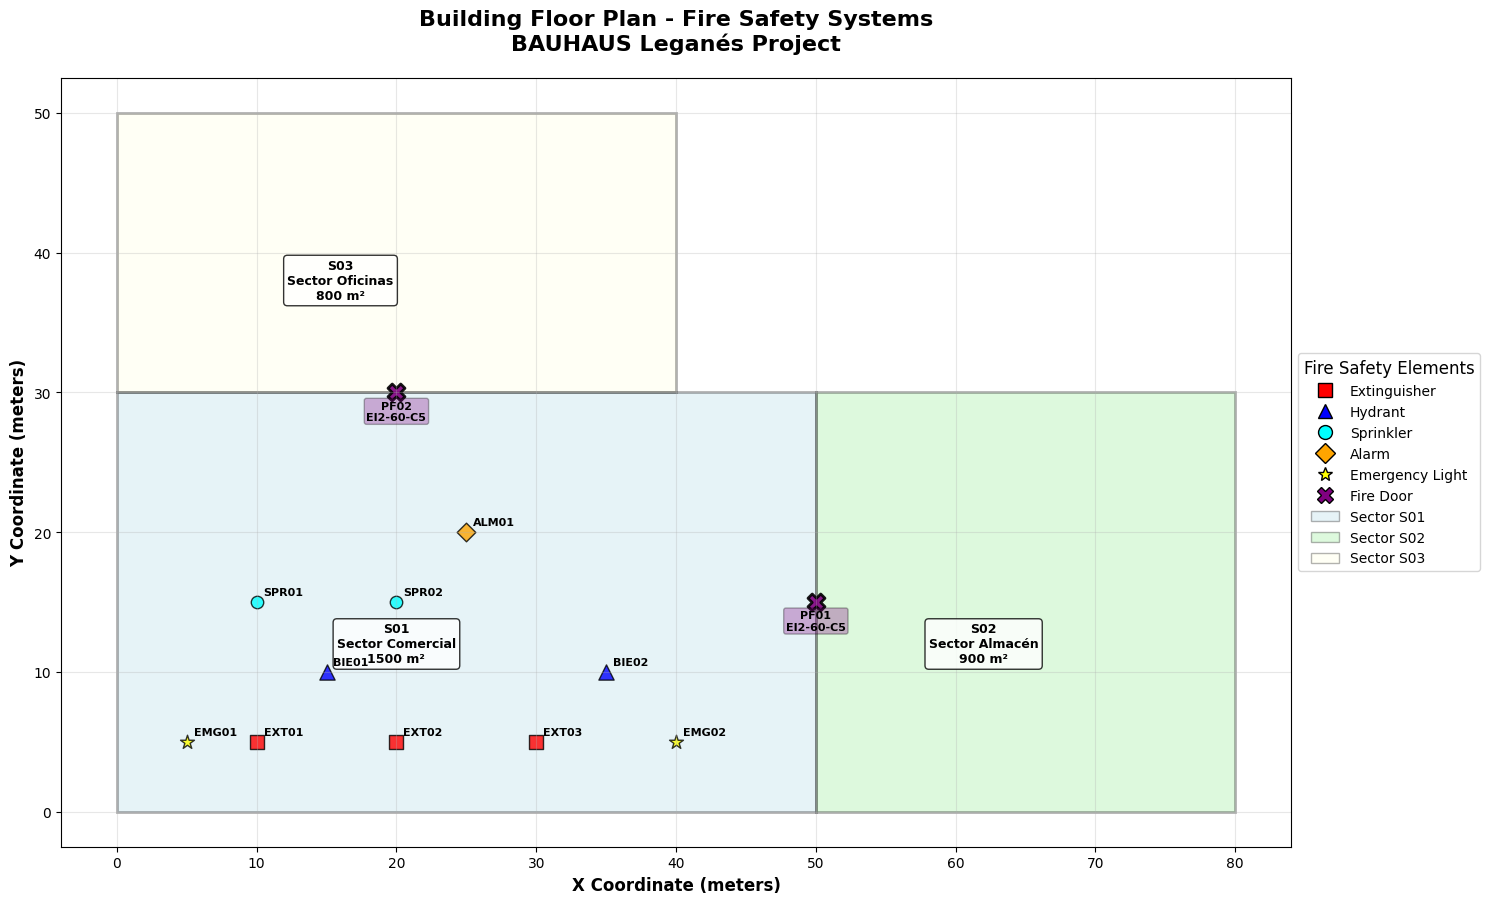

🎨 Floor plan visualization complete!
📝 The plot shows:
   - Colored areas represent fire sectors
   - Different symbols represent fire equipment types
   - Purple X marks show fire door locations


In [13]:
# Create comprehensive floor plan visualization
fig, ax = plt.subplots(figsize=(15, 10))

# Color scheme for equipment types
equipment_colors = {
    'extinguisher': 'red',
    'hydrant': 'blue',
    'sprinkler': 'cyan',
    'alarm': 'orange',
    'emergency_light': 'yellow'
}

# Plot building sectors
sector_colors = ['lightblue', 'lightgreen', 'lightyellow']
for i, sector in enumerate(sectorization_data['sectors']):
    boundary = sector['boundary']
    if boundary:  # Make sure boundary exists
        # Create polygon for sector
        polygon = patches.Polygon(boundary, closed=True, 
                                alpha=0.3, 
                                facecolor=sector_colors[i % len(sector_colors)],
                                edgecolor='black',
                                linewidth=2)
        ax.add_patch(polygon)
        
        # Add sector label at centroid
        x_coords = [point[0] for point in boundary]
        y_coords = [point[1] for point in boundary]
        centroid_x = sum(x_coords) / len(x_coords)
        centroid_y = sum(y_coords) / len(y_coords)
        
        ax.text(centroid_x, centroid_y, 
               f"{sector['id']}\n{sector['name']}\n{sector['area']} m²",
               ha='center', va='center', 
               bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8),
               fontsize=9, fontweight='bold')

# Plot fire equipment
equipment_legend = {}
for equipment in fire_equipment_data['equipment']:
    x, y = equipment['position']
    eq_type = equipment['type']
    color = equipment_colors.get(eq_type, 'gray')
    
    # Different markers for different equipment types
    if eq_type == 'extinguisher':
        marker = 's'  # square
        size = 100
    elif eq_type == 'hydrant':
        marker = '^'  # triangle
        size = 120
    elif eq_type == 'sprinkler':
        marker = 'o'  # circle
        size = 80
    elif eq_type == 'alarm':
        marker = 'D'  # diamond
        size = 90
    else:  # emergency_light
        marker = '*'  # star
        size = 110
    
    scatter = ax.scatter(x, y, c=color, marker=marker, s=size, 
                        edgecolors='black', linewidth=1, alpha=0.8)
    
    # Add equipment ID label
    ax.annotate(equipment['id'], (x, y), xytext=(5, 5), 
               textcoords='offset points', fontsize=8, fontweight='bold')
    
    # Track for legend
    if eq_type not in equipment_legend:
        equipment_legend[eq_type] = scatter

# Plot fire doors
for door in sectorization_data['fire_doors']:
    x, y = door['position']
    ax.scatter(x, y, c='purple', marker='X', s=150, 
              edgecolors='black', linewidth=2, alpha=0.9)
    ax.annotate(f"{door['id']}\n{door['fire_rating']}", (x, y), 
               xytext=(0, -20), textcoords='offset points',
               ha='center', fontsize=8, fontweight='bold',
               bbox=dict(boxstyle='round,pad=0.2', facecolor='purple', alpha=0.3))

# Customize plot
ax.set_xlabel('X Coordinate (meters)', fontsize=12, fontweight='bold')
ax.set_ylabel('Y Coordinate (meters)', fontsize=12, fontweight='bold')
ax.set_title('Building Floor Plan - Fire Safety Systems\nBAUHAUS Leganés Project', 
            fontsize=16, fontweight='bold', pad=20)
ax.grid(True, alpha=0.3)
ax.set_aspect('equal')

# Create legend
legend_elements = []
for eq_type, color in equipment_colors.items():
    if eq_type == 'extinguisher':
        marker = 's'
    elif eq_type == 'hydrant':
        marker = '^'
    elif eq_type == 'sprinkler':
        marker = 'o'
    elif eq_type == 'alarm':
        marker = 'D'
    else:
        marker = '*'
    
    legend_elements.append(plt.Line2D([0], [0], marker=marker, color='w', 
                                     markerfacecolor=color, markersize=10,
                                     markeredgecolor='black', markeredgewidth=1,
                                     label=eq_type.replace('_', ' ').title()))

# Add fire door to legend
legend_elements.append(plt.Line2D([0], [0], marker='X', color='w', 
                                 markerfacecolor='purple', markersize=12,
                                 markeredgecolor='black', markeredgewidth=1,
                                 label='Fire Door'))

# Add sector legend
for i, sector in enumerate(sectorization_data['sectors']):
    color = sector_colors[i % len(sector_colors)]
    legend_elements.append(patches.Patch(facecolor=color, alpha=0.3, 
                                        edgecolor='black', linewidth=1,
                                        label=f"Sector {sector['id']}"))

ax.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5),
         fontsize=10, title='Fire Safety Elements', title_fontsize=12)

plt.tight_layout()
plt.show()

print("🎨 Floor plan visualization complete!")
print("📝 The plot shows:")
print("   - Colored areas represent fire sectors")
print("   - Different symbols represent fire equipment types")
print("   - Purple X marks show fire door locations")

## Equipment Coverage Analysis

Let's analyze the coverage areas of fire equipment to ensure proper protection throughout the building.

📊 Coverage Analysis:
   EXT01 (extinguisher): 15m radius, 706.9 m² coverage
   BIE01 (hydrant): 25m radius, 1963.5 m² coverage
   SPR01 (sprinkler): 3.5m radius, 38.5 m² coverage


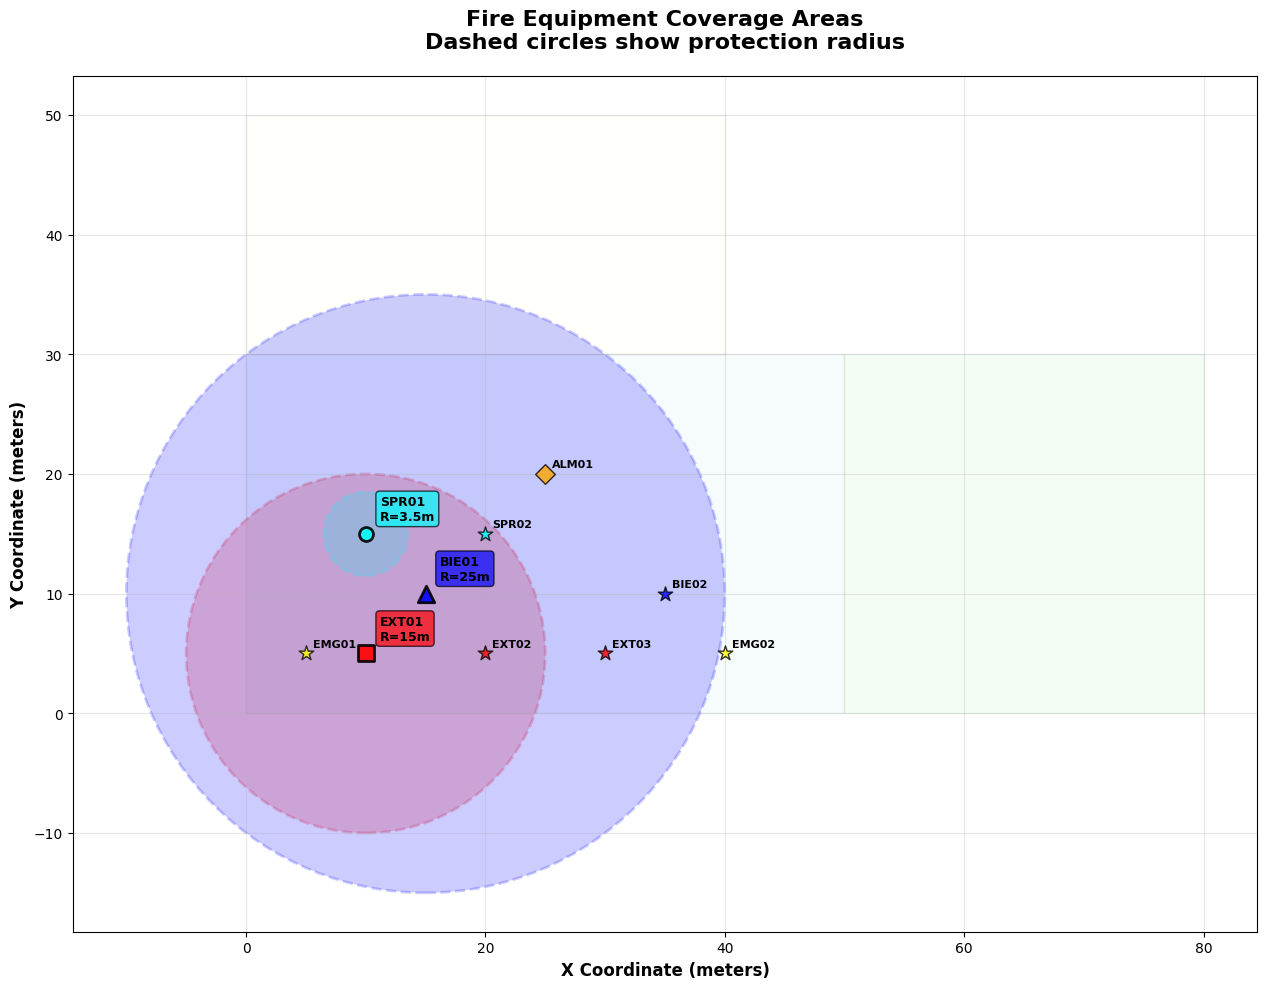


✅ Coverage analysis complete!
📝 Dashed circles show the effective range of fire protection equipment


In [ ]:
# Create coverage area visualization
fig, ax = plt.subplots(figsize=(14, 10))

# Plot building sectors (same style as Floor Plan Visualization)
for i, sector in enumerate(sectorization_data['sectors']):
    boundary = sector['boundary']
    if boundary:
        # Sector polygon
        polygon = patches.Polygon(
            boundary,
            closed=True,
            alpha=0.3,
            facecolor=sector_colors[i % len(sector_colors)],
            edgecolor='black',
            linewidth=2,
        )
        ax.add_patch(polygon)

        # Sector label at centroid
        x_coords = [p[0] for p in boundary]
        y_coords = [p[1] for p in boundary]
        centroid_x = sum(x_coords) / len(x_coords)
        centroid_y = sum(y_coords) / len(y_coords)
        ax.text(
            centroid_x,
            centroid_y,
            f"{sector['id']}\n{sector['name']}\n{sector['area']} m²",
            ha='center',
            va='center',
            bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8),
            fontsize=9,
            fontweight='bold',
            zorder=2,
        )

# Plot equipment coverage areas
coverage_info = fire_equipment_data.get('coverage_areas', [])
equipment_by_id = {eq['id']: eq for eq in fire_equipment_data['equipment']}

for coverage in coverage_info:
    equipment_id = coverage['equipment_id']
    radius = coverage['radius']
    
    if equipment_id in equipment_by_id:
        equipment = equipment_by_id[equipment_id]
        x, y = equipment['position']
        eq_type = equipment['type']
        
        # Create coverage circle
        circle = patches.Circle((x, y), radius, 
                              facecolor=equipment_colors.get(eq_type, 'gray'),
                              alpha=0.2, 
                              edgecolor=equipment_colors.get(eq_type, 'gray'),
                              linewidth=2,
                              linestyle='--')
        ax.add_patch(circle)
        
        # Plot equipment location
        if eq_type == 'extinguisher':
            marker = 's'
            size = 120
        elif eq_type == 'hydrant':
            marker = '^'
            size = 140
        else:
            marker = 'o'
            size = 100
        
        ax.scatter(x, y, c=equipment_colors.get(eq_type, 'gray'), 
                  marker=marker, s=size,
                  edgecolors='black', linewidth=2, alpha=0.9, zorder=5)
        
        # Add labels with coverage info
        ax.annotate(f"{equipment_id}\nR={radius}m", (x, y), 
                   xytext=(10, 10), textcoords='offset points',
                   fontsize=9, fontweight='bold',
                   bbox=dict(boxstyle='round,pad=0.3', 
                            facecolor=equipment_colors.get(eq_type, 'gray'), 
                            alpha=0.7))

# Plot all other equipment without coverage data
covered_ids = {coverage['equipment_id'] for coverage in coverage_info}
for equipment in fire_equipment_data['equipment']:
    if equipment['id'] not in covered_ids:
        x, y = equipment['position']
        eq_type = equipment['type']
        
        if eq_type == 'alarm':
            marker = 'D'
            size = 100
        else:  # emergency_light
            marker = '*'
            size = 120
        
        ax.scatter(x, y, c=equipment_colors.get(eq_type, 'gray'), 
                  marker=marker, s=size,
                  edgecolors='black', linewidth=1, alpha=0.8, zorder=5)
        
        ax.annotate(equipment['id'], (x, y), 
                   xytext=(5, 5), textcoords='offset points',
                   fontsize=8, fontweight='bold')

ax.set_xlabel('X Coordinate (meters)', fontsize=12, fontweight='bold')
ax.set_ylabel('Y Coordinate (meters)', fontsize=12, fontweight='bold')
ax.set_title('Fire Equipment Coverage Areas\nDashed circles show protection radius', 
            fontsize=16, fontweight='bold', pad=20)
ax.grid(True, alpha=0.3)
ax.set_aspect('equal')

# Add coverage statistics
print("📊 Coverage Analysis:")
print("=" * 40)
for coverage in coverage_info:
    equipment_id = coverage['equipment_id']
    radius = coverage['radius']
    equipment = equipment_by_id[equipment_id]
    area = np.pi * radius**2
    print(f"   {equipment_id} ({equipment['type']}): {radius}m radius, {area:.1f} m² coverage")

plt.tight_layout()
plt.show()

print("\n✅ Coverage analysis complete!")
print("📝 Dashed circles show the effective range of fire protection equipment")

In [ ]:
# Optional overlay version of the coverage analysis with floor plan background
from pathlib import Path

fig, ax = plt.subplots(figsize=(14, 10))

# Path to an optional floor plan image aligned to drawing coordinates
# Place your raster export of the CAD (PNG/JPG) here. SVG not supported by imread.
floorplan_path = Path('../data/blueprints/cad/floorplan.png')

# Derive extents from sectors and equipment to align the image to data coords
all_x, all_y = [], []
for s in sectorization_data['sectors']:
    b = s.get('boundary')
    if b:
        xs, ys = zip(*b)
        all_x.extend(xs)
        all_y.extend(ys)
for eq in fire_equipment_data['equipment']:
    ex, ey = eq['position']
    all_x.append(ex)
    all_y.append(ey)

if all_x and all_y:
    min_x, max_x = min(all_x), max(all_x)
    min_y, max_y = min(all_y), max(all_y)
else:
    min_x, max_x, min_y, max_y = 0, 100, 0, 100

# Draw floor plan first (lowest zorder)
if floorplan_path.exists():
    try:
        img = plt.imread(floorplan_path)
        ax.imshow(img, extent=[min_x, max_x, min_y, max_y], origin='lower', alpha=0.35, zorder=0)
        print(f"🖼️ Floor plan overlay: {floorplan_path}")
    except Exception as e:
        print(f"⚠️ Could not load floor plan image: {e}")
else:
    print("ℹ️ No floor plan image found. Add '../data/blueprints/cad/floorplan.png' to enable overlay.")

# Plot building sectors lightly to keep image visible
for i, sector in enumerate(sectorization_data['sectors']):
    boundary = sector['boundary']
    if boundary:
        polygon = patches.Polygon(
            boundary,
            closed=True,
            alpha=0.10,
            facecolor=sector_colors[i % len(sector_colors)],
            edgecolor='gray',
            linewidth=1,
            zorder=1,
        )
        ax.add_patch(polygon)

# Coverage areas
coverage_info = fire_equipment_data.get('coverage_areas', [])
equipment_by_id = {eq['id']: eq for eq in fire_equipment_data['equipment']}

for coverage in coverage_info:
    equipment_id = coverage['equipment_id']
    radius = coverage['radius']
    if equipment_id in equipment_by_id:
        equipment = equipment_by_id[equipment_id]
        x, y = equipment['position']
        eq_type = equipment['type']

        circle = patches.Circle(
            (x, y),
            radius,
            facecolor=equipment_colors.get(eq_type, 'gray'),
            alpha=0.20,
            edgecolor=equipment_colors.get(eq_type, 'gray'),
            linewidth=2,
            linestyle='--',
            zorder=2,
        )
        ax.add_patch(circle)

        if eq_type == 'extinguisher':
            marker, size = 's', 120
        elif eq_type == 'hydrant':
            marker, size = '^', 140
        else:
            marker, size = 'o', 100

        ax.scatter(
            x,
            y,
            c=equipment_colors.get(eq_type, 'gray'),
            marker=marker,
            s=size,
            edgecolors='black',
            linewidth=2,
            alpha=0.9,
            zorder=3,
        )

        ax.annotate(
            f"{equipment_id}\nR={radius}m",
            (x, y),
            xytext=(10, 10),
            textcoords='offset points',
            fontsize=9,
            fontweight='bold',
            bbox=dict(
                boxstyle='round,pad=0.3',
                facecolor=equipment_colors.get(eq_type, 'gray'),
                alpha=0.7,
            ),
        )

# Other equipment without coverage
covered_ids = {c['equipment_id'] for c in coverage_info}
for equipment in fire_equipment_data['equipment']:
    if equipment['id'] in covered_ids:
        continue
    x, y = equipment['position']
    eq_type = equipment['type']

    if eq_type == 'alarm':
        marker, size = 'D', 100
    else:
        marker, size = '*', 120

    ax.scatter(
        x,
        y,
        c=equipment_colors.get(eq_type, 'gray'),
        marker=marker,
        s=size,
        edgecolors='black',
        linewidth=1,
        alpha=0.85,
        zorder=3,
    )
    ax.annotate(
        equipment['id'],
        (x, y),
        xytext=(5, 5),
        textcoords='offset points',
        fontsize=8,
        fontweight='bold',
    )

ax.set_xlabel('X Coordinate (meters)', fontsize=12, fontweight='bold')
ax.set_ylabel('Y Coordinate (meters)', fontsize=12, fontweight='bold')
ax.set_title('Fire Equipment Coverage with Floor Plan Overlay', fontsize=16, fontweight='bold', pad=20)
ax.grid(True, alpha=0.30)
ax.set_aspect('equal')
plt.tight_layout()
plt.show()


<!-- Removed example data generation section. This tutorial works solely with CAD-extracted JSONs. -->


In [7]:
# Skipped: Example data generation
# This notebook uses only CAD-extracted JSON files:
#   - ../data/blueprints/cad/I01.4_mock_data.json
#   - ../data/blueprints/cad/I01.6_mock_data.json
pass

In [8]:
# Load the comprehensive example data
try:
    with open('../data/extracted/tutorial_example.json', 'r', encoding='utf-8') as f:
        example_project = json.load(f)
    
    print("🏗️ Comprehensive Building Data Loaded:")
    print("=" * 50)
    print(f"   Project: {example_project['metadata']['project_name']}")
    print(f"   Building Type: {example_project['metadata'].get('building_type', 'Unknown')}")
    print(f"   Levels: {len(example_project['levels'])}")
    # Count rooms, doors, etc. from levels (tutorial data structure)
    total_rooms = 0
    total_doors = 0
    total_walls = 0
    total_fire_equipment = 0
    
    for level in example_project['levels']:
        total_rooms += len(level.get('rooms', []))
        total_doors += len(level.get('doors', []))
        total_walls += len(level.get('walls', []))
        total_fire_equipment += len(level.get('fire_equipment', []))
    
    print(f"   Rooms: {total_rooms}")
    print(f"   Doors: {total_doors}")
    print(f"   Walls: {total_walls}")
    print(f"   Fire Equipment: {total_fire_equipment}")
    print(f"   Fire Sectors: {len(example_project.get('sectors', []))}")
    print(f"   Evacuation Routes: {len(example_project.get('evacuation_routes', []))}")
    
    # Show room types
    room_types = {}
    for level in example_project['levels']:
        for room in level.get('rooms', []):
            use_type = room.get('use', 'unknown')  # Note: tutorial data uses 'use' not 'use_type'
            room_types[use_type] = room_types.get(use_type, 0) + 1
    
    print("\n🏠 Room Types:")
    for room_type, count in sorted(room_types.items()):
        print(f"   {room_type.replace('_', ' ').title()}: {count}")
        
except FileNotFoundError:
    print("⚠️ Example data file not found. Using basic mock data only.")
    example_project = None

🏗️ Comprehensive Building Data Loaded:
   Project: Tutorial Building Example
   Building Type: commercial
   Levels: 1
   Rooms: 4
   Doors: 4
   Walls: 7
   Fire Equipment: 0
   Fire Sectors: 0
   Evacuation Routes: 0

🏠 Room Types:
   Meeting: 1
   Office: 1
   Reception: 1
   Storage: 1


## Summary

In this tutorial, we've learned how to:

1. **Load CAD Data**: Import fire safety and sectorization data extracted from DWG files
2. **Analyze Equipment**: Inventory and categorize fire protection equipment
3. **Visualize Floor Plans**: Create comprehensive visual representations of building data
4. **Coverage Analysis**: Understand protection areas and equipment effectiveness
5. **Work with Real Data**: Load comprehensive building models

### Key Takeaways:

- **DWG/DXF files** contain rich geometric and annotation data about buildings
- **Fire equipment** must be properly distributed to ensure adequate coverage
- **Building sectorization** is critical for fire containment and evacuation
- **Visualization** helps identify gaps and optimization opportunities

### Next Steps:

In the next tutorial, we'll learn how to:
- Calculate geometric properties (areas, perimeters)
- Find optimal evacuation routes
- Analyze circulation patterns
- Perform compliance checks

**Ready to continue?** → Open `02_calculations_simple.ipynb`